# Quantum teleportation and superdense coding

## Quantum teleportation

We are going to use Qiskit to implement the quantum teleportation protocol

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random, time

# We will create a random qubit by directly assigning random amplitudes

a1 = random.random()*2 -1 #Uniform number in [-1,1]
a2 = random.random()*2 -1
b1 = random.random()*2 -1
b2 = random.random()*2 -1

# We need to normalize

norm = (a1**2 + a2**2 + b1**2 + b2**2)**0.5

c1 = complex(a1/norm,a2/norm) #Amplitude for |0> 
c2 = complex(b1/norm,b2/norm) #Amplitude for |1>

psi = QuantumRegister(1, name  = 'psi')  # The qubit to teleport
bell = QuantumRegister(2, name = 'bell') # The shared entangled pair 
c = ClassicalRegister(2, name  = 'c') # Two classical bits for the measures

teleport = QuantumCircuit(psi,bell,c) # We create the circuit with the two quantum registers and the classical bits
teleport.initialize([c1,c2],psi) # We set the amplitudes for Alice's quibt
teleport.barrier()

print("Alice's qubit is:")
print(c1,"|0> + ",
      c2,"|1>")

Alice's qubit is:
(0.7308047197292922+0.140632783844985j) |0> +  (0.032224871315905686-0.6671644770205275j) |1>


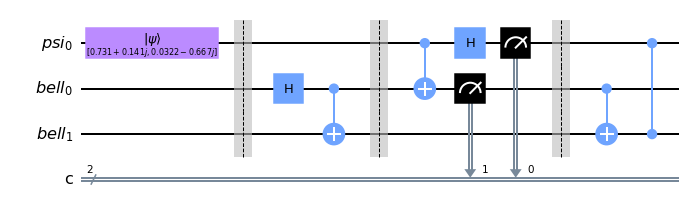

In [2]:
# Now we create the Bell pair

teleport.h(bell[0])
teleport.cx(bell[0],bell[1])
teleport.barrier()

# We apply CNOT to |psi> and Alice's part of the entangled pair
# We also apply the H gate
# Then, Alice measure her qubits and send the results to Bob

teleport.cx(psi,bell[0])
teleport.h(psi)
teleport.measure([psi[0],bell[0]],c)
teleport.barrier()

# Bob applies his gates depending on the values received from Alice 

teleport.cx(bell[0],bell[1])
teleport.cz(psi,bell[1])

teleport.draw(output='mpl')

In [3]:
# We run the circuit and access the amplitudes to check that Bob got the qubit

backend = Aer.get_backend('statevector_simulator')
job = execute(teleport, backend)
outputstate = job.result().get_statevector()
print(outputstate)



[0.        +0.j         0.73080472+0.14063278j 0.        +0.j
 0.        +0.j         0.        +0.j         0.03222487-0.66716448j
 0.        +0.j         0.        -0.j        ]


## Supendense coding

Now, we are going to implement a circuit to simulate superdense coding

Alice wants to send  1 0


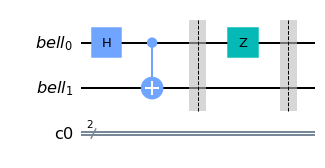

In [4]:
# We start by creating the Bell pair that Alice and Bob share

bell = QuantumRegister(2, name = 'bell') # We need two qubits
c = ClassicalRegister(2) # And two bits for the measurements 
dense = QuantumCircuit(bell,c)
dense.h(bell[0])
dense.cx(bell[0],bell[1])
dense.barrier()

# We randomly choose which bits to send

b1 = random.randint(0,1)
b2 = random.randint(0,1)

print("Alice wants to send ",b1,b2)

# And we apply the gates accordingly

if(b2==1):
    dense.x(bell[0])
if(b1==1):
    dense.z(bell[0])
    
dense.barrier()

dense.draw(output='mpl')

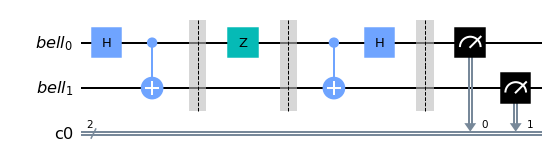

In [5]:
# Alice sends her qubit to Bob, who applies his gates and measures

dense.cx(bell[0],bell[1])
dense.h(bell[0])
dense.barrier()
dense.measure(bell,c)
dense.draw(output='mpl')


In [6]:
# Let us run the circuit

backend = Aer.get_backend('qasm_simulator')
job = execute(dense, backend, shots = 1, memory = True)
result = job.result().get_memory()

print("Bob has received ",int(result[0][1]),int(result[0][0]))


Bob has received  1 0
